# prep_data

This notebook prepares the data for the project.  This is detail beyond the scope of the project, but you're welcome to take a look!

## Step 1: Get time series for incoming solar radiation

In [1]:
#=================================================================
# This first cell contains some necessary initialization commands.
#=================================================================
import sys
sys.path.append('/mnt/local/pyferret/lib/python3.6/site-packages')
import pyferret
import numpy as np
pyferret.addenv(FER_DIR='/mnt/local/pyferret', FER_DAT='/mnt/local/FerretDatasets')
pyferret.start(journal=False, quiet=True, unmapped=True)
%load_ext ferretmagic

In [2]:
%%ferret
set memory /size=80000
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel*.nc")
TSERIES srb_all = file_list
sh d


currently SET data sets:
 1> srb_all (default)
 name title I J K L
 SW_TOA_DN
 All-Sky Shortwave TOA Downward 1:360 1:180 ... 1:288
 CLR_SW_SFC_DN
 Clear-Sky Shortwave Surface Dow 1:360 1:180 ... 1:288
 PRIST_SW_SFC_DN
 Pristine-Sky Shortwave Surface 1:360 1:180 ... 1:288
 SW_SFC_DN
 All-Sky Shortwave Surface Downw 1:360 1:180 ... 1:288
 SW_SFC_NET
 All-Sky Shortwave Surface Net F 1:360 1:180 ... 1:288
 SW_SFC_ALB
 All-Sky Shortwave Surface Albed 1:360 1:180 ... 1:288

In [4]:
%%ferret
!shade (sw_toa_dn[l=@AVE] - sw_sfc_dn[l=@AVE]); go fland
!plot sw_sfc_dn[x=-10,y=57]
list sw_toa_dn[x=@AVE,y=@AVE,l=@AVE]
list clr_sw_sfc_dn[x=@AVE,y=@AVE,l=@AVE]
list prist_sw_sfc_dn[x=@AVE,y=@AVE,l=@AVE]
list sw_sfc_dn[x=@AVE,y=@AVE,l=@AVE]
list sw_sfc_net[x=@AVE,y=@AVE,l=@AVE]

VARIABLE : All-Sky Shortwave TOA Downward Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 341.8
 VARIABLE : Clear-Sky Shortwave Surface Downward Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 256.4
 VARIABLE : Pristine-Sky Shortwave Surface Downward Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 243.1
 VARIABLE : All-Sky Shortwave Surface Downward Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 182.1
 VARIABLE : All-Sky Shortwave Surface Net Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 159.5

Each of these shortwave fluxes gets progressively smaller
which implies that there are more and more "blocking" effects
(clouds, aerosols, etc.).  The net flux takes into account the
relatively small amount of radiative emission of the surface
due to its own temperature (and not just the amount of incident
light).  So, in this case, use the `All-Sky SW Downward flux` to
account for clouds, etc.  And you can see it's alot noisier and
smaller than the `Clear Sky SW Downward flux`.


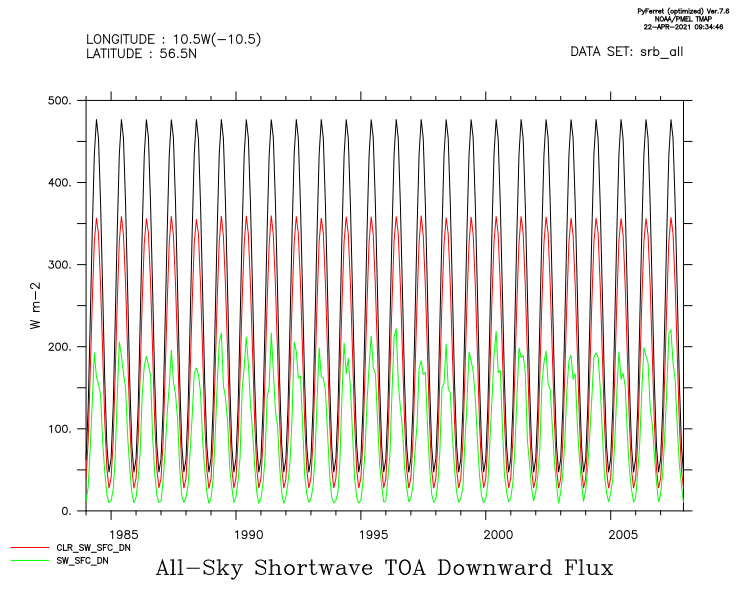

In [6]:
%%ferret
plot sw_toa_dn[x=-10,y=57]
plot /over /color=2 clr_sw_sfc_dn[x=-10,y=57]
plot /over /color=3 sw_sfc_dn[x=-10,y=57]

# Step 2: Create an incoming light climatology

So here we load each month, find the mean, and spit out the month's value.  Manually copy these values into a 2020-2021 spreadsheet for display.  Use 2020-2021 as the year for the data so it can be overlaid on the NRT data later.

In [28]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????01.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 02-JUL-1983 00:00 to 02-JUL-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 16.41 3.670

In [29]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????02.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 02-AUG-1983 00:00 to 02-AUG-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 36.66 7.252

In [30]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????03.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 31-AUG-1983 12:00 to 30-AUG-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 74.29 9.016

In [31]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????04.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 01-OCT-1983 12:00 to 30-SEP-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 137.5 12.59

In [32]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????05.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 31-OCT-1983 12:00 to 30-OCT-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 187.3 18.13

In [33]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????06.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 01-DEC-1983 12:00 to 30-NOV-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 193.3 18.95

In [34]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????07.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 31-DEC-1983 12:00 to 30-DEC-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 168.1 11.38

In [35]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????08.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 31-JAN-1984 12:00 to 30-JAN-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 149.1 14.88

In [36]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????09.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 02-MAR-1984 12:00 to 01-MAR-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 97.53 8.247

In [37]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????10.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 01-APR-1984 12:00 to 31-MAR-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 51.59 6.929

In [38]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????11.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 02-MAY-1984 12:00 to 01-MAY-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 23.98 5.404

In [39]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????12.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 01-JUN-1984 12:00 to 31-MAY-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 10.27 0.7698

# Step 3: Create chlorophyll climatology



# Step 4: Create SLP climatology

From CORE2 data

In [42]:
%%ferret
cancel variable /all
cancel data /all
use /mnt/courses/eos2585/CORE2/clims/slp_avg_1948to2009.nc
use /mnt/courses/eos2585/CORE2/clims/slp_var_1948to2009.nc
list slp[x=10,y=57]

VARIABLE : Sea Level Pressure (Pa)
 FILENAME : slp_var_1948to2009.nc
 FILEPATH : /mnt/courses/eos2585/CORE2/clims/
 SUBSET : 1460 points (TIME)
 CALENDAR : NOLEAP
 LONGITUDE: 10E
 LATITUDE : 57N
 10E 
 10
 01-JAN-1948 03:00 / 1: 122785.
 01-JAN-1948 09:00 / 2: 162060.
 01-JAN-1948 15:00 / 3: 152958.
 01-JAN-1948 21:00 / 4: 166290.
 02-JAN-1948 03:00 / 5: 138636.
 02-JAN-1948 09:00 / 6: 164547.
 02-JAN-1948 15:00 / 7: 167661.
 02-JAN-1948 21:00 / 8: 177390.
 03-JAN-1948 03:00 / 9: 168320.
 03-JAN-1948 09:00 / 10: 219136.
 03-JAN-1948 15:00 / 11: 193614.
 03-JAN-1948 21:00 / 12: 193732.
 04-JAN-1948 03:00 / 13: 162706.
 04-JAN-1948 09:00 / 14: 196746.
 04-JAN-1948 15:00 / 15: 195967.
 04-JAN-1948 21:00 / 16: 196370.
 05-JAN-1948 03:00 / 17: 151306.
 05-JAN-1948 09:00 / 18: 214638.
 05-JAN-1948 15:00 / 19: 181048.
 05-JAN-1948 21:00 / 20: 177698.
 06-JAN-1948 03:00 / 21: 149177.
 06-JAN-1948 09:00 / 22: 196450.
 06-JAN-1948 15:00 / 23: 145776.
 06-JAN-1948 21:00 / 24: 164044.
 07-JAN-1948 03:00 / 25: 121002.
 07-JAN-1948 09:00 / 26: 181827.
 07-JAN-1948 15:00 / 27: 134655.
 07-JAN-1948 21:00 / 28: 162269.
 08-JAN-1948 03:00 / 29: 124673.
 08-JAN-1948 09:00 / 30: 164534.
 08-JAN-1948 15:00 / 31: 122762.
 08-JAN-1948 21:00 / 32: 162113.
 09-JAN-1948 03:00 / 33: 105982.
 09-JAN-1948 09:00 / 34: 144147.
 09-JAN-1948 15:00 / 35: 116569.
 09-JAN-1948 21:00 / 36: 165900.
 10-JAN-1948 03:00 / 37: 100390.
 10-JAN-1948 09:00 / 38: 157676.
 10-JAN-1948 15:00 / 39: 125103.
 10-JAN-1948 21:00 / 40: 138697.
 11-JAN-1948 03:00 / 41: 111333.
 11-JAN-1948 09:00 / 42: 175196.
 11-JAN-1948 15:00 / 43: 135069.
 11-JAN-1948 21:00 / 44: 171905.
 12-JAN-1948 03:00 / 45: 135957.
 12-JAN-1948 09:00 / 46: 189458.
 12-JAN-1948 15:00 / 47: 156609.
 12-JAN-1948 21:00 / 48: 207870.
 13-JAN-1948 03:00 / 49: 151579.
 13-JAN-1948 09:00 / 50: 188068.
 13-JAN-1948 15:00 / 51: 139413.
 13-JAN-1948 21:00 / 52: 180407.
 14-JAN-1948 03:00 / 53: 146675.
 14-JAN-1948 09:00 / 54: 161527.
 14-JAN-1948 15:00 / 55: 142709.
 14-JAN-1948 21:00 / 56: 144356.
 15-JAN-1948 03:00 / 57: 133784.
 15-JAN-1948 09:00 / 58: 150322.
 15-JAN-1948 15:00 / 59: 144007.
 15-JAN-1948 21:00 / 60: 147215.
 16-JAN-1948 03:00 / 61: 142426.
 16-JAN-1948 09:00 / 62: 151882.
 16-JAN-1948 15:00 / 63: 127554.
 16-JAN-1948 21:00 / 64: 151770.
 17-JAN-1948 03:00 / 65: 113442.
 17-JAN-1948 09:00 / 66: 143184.
 17-JAN-1948 15:00 / 67: 112244.
 17-JAN-1948 21:00 / 68: 143239.
 18-JAN-1948 03:00 / 69: 108019.
 18-JAN-1948 09:00 / 70: 141798.
 18-JAN-1948 15:00 / 71: 118078.
 18-JAN-1948 21:00 / 72: 141780.
 19-JAN-1948 03:00 / 73: 104442.
 19-JAN-1948 09:00 / 74: 166514.
 19-JAN-1948 15:00 / 75: 90613.
 19-JAN-1948 21:00 / 76: 140839.
 20-JAN-1948 03:00 / 77: 100417.
 20-JAN-1948 09:00 / 78: 142643.
 20-JAN-1948 15:00 / 79: 116335.
 20-JAN-1948 21:00 / 80: 131208.
 21-JAN-1948 03:00 / 81: 106709.
 21-JAN-1948 09:00 / 82: 145701.
 21-JAN-1948 15:00 / 83: 131210.
 21-JAN-1948 21:00 / 84: 160255.
 22-JAN-1948 03:00 / 85: 133978.
 22-JAN-1948 09:00 / 86: 177131.
 22-JAN-1948 15:00 / 87: 145979.
 22-JAN-1948 21:00 / 88: 162840.
 23-JAN-1948 03:00 / 89: 130814.
 23-JAN-1948 09:00 / 90: 177603.
 23-JAN-1948 15:00 / 91: 138355.
 23-JAN-1948 21:00 / 92: 151202.
 24-JAN-1948 03:00 / 93: 124627.
 24-JAN-1948 09:00 / 94: 162780.
 24-JAN-1948 15:00 / 95: 133265.
 24-JAN-1948 21:00 / 96: 154877.
 25-JAN-1948 03:00 / 97: 116006.
 25-JAN-1948 09:00 / 98: 180687.
 25-JAN-1948 15:00 / 99: 158260.
 25-JAN-1948 21:00 / 100: 158800.
 26-JAN-1948 03:00 / 101: 132672.
 26-JAN-1948 09:00 / 102: 162109.
 26-JAN-1948 15:00 / 103: 144441.
 26-JAN-1948 21:00 / 104: 165489.
 27-JAN-1948 03:00 / 105: 145068.
 27-JAN-1948 09:00 / 106: 175693.
 27-JAN-1948 15:00 / 107: 168754.
 27-JAN-1948 21:00 / 108: 175788.
 28-JAN-1948 03:00 / 109: 160567.
 28-JAN-1948 09:00 / 110: 168625.
 28-JAN-1948 15:00 / 111: 175952.
 28-JAN-1948 21:00 / 112: 150244.
 29-JAN-1948 03:00 / 113: 120514.
 29-JAN-1948 09:00 / 114: 122600.
 29-JAN-1948 15:00 / 115: 13